In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import os

در این بخش ابتدا تصویر را به خاکستری تبدیل می‌کنیم تا راحتتر فیلترها را اعمال کنیم
فیلترها عبارتند از میانه برای ایجاد کمی تاری سپس مرزها را پیدا می‌کنیم سپس بایلترال فیلتر را اعمال می‌کنیم که تصویر را صاف و نرم تر می‌کند ولی با حفظ مرزها سپس با تصویر رنگی ترکیب می‌کنیم تا افکت کارتونی حاصل شود


In [3]:
def cartoonify(image):
    # Check if the image is loaded correctly
    if image is None:
        print("Cannot find any image. Choose an appropriate file")
        sys.exit()

    # Convert the image to grayscale
    grayScaleImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply median blur to the grayscale image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)

    # Use adaptive thresholding to detect edges in the image
    getEdge = cv2.adaptiveThreshold(
        smoothGrayScale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9
    )

    # Apply bilateral filter to the original image to smooth colors
    colorImage = cv2.bilateralFilter(image, 9, 300, 300)

    # Combine the edge mask with the color image to create a cartoon effect
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

    # Return the cartoonified image
    return cartoonImage

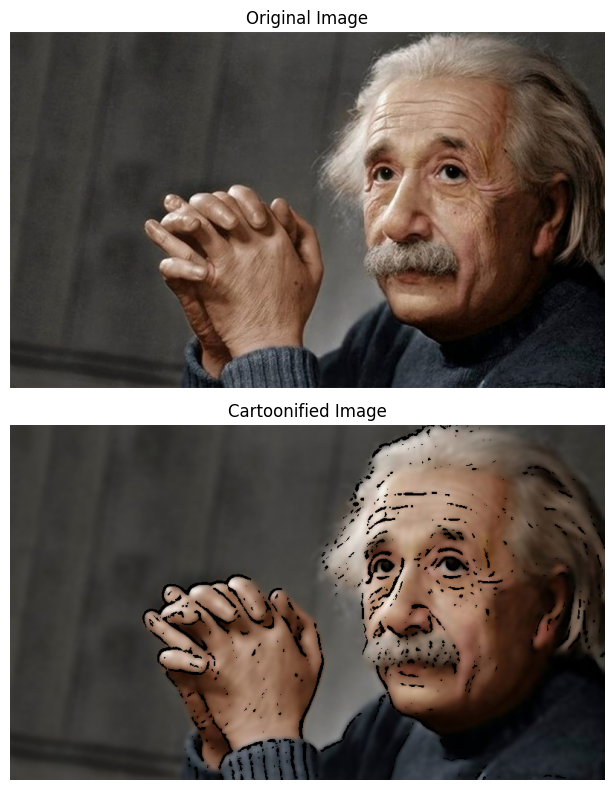

In [6]:
# Read the input image
# Define the path to the image file using os.path.join
image_path = os.path.join("./", "Einstein.jpeg")

# Read the input image
image = cv2.imread(image_path)
# Convert the image from BGR (OpenCV default) to RGB (Matplotlib default)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Apply the cartoonify function to the image
result = cartoonify(image)

# Create a figure to display the images
plt.figure(figsize=(18, 8))

# Display the original image
plt.subplot(2, 1, 1)
plt.axis("off")  # Turn off axis
plt.imshow(image)  # Display the original image
plt.title("Original Image")  # Set the title for the original image

# Display the cartoonified image
plt.subplot(2, 1, 2)
plt.axis("off")  # Turn off axis
plt.imshow(result)  # Display the cartoonified image
plt.title("Cartoonified Image")  # Set the title for the cartoonified image

# Adjust layout for better spacing
plt.tight_layout()
# Show the figure
plt.show()

In [4]:
def visualize_fps(image, fps: int):
    # Check if the image is grayscale or colored.
    # If it's grayscale, set the text color to white; if colored, set the text color to green.
    if len(np.shape(image)) < 3:
        text_color = (255, 255, 255)  # White color for grayscale images.
    else:
        text_color = (0, 255, 0)  # Green color for colored images.

    # Define the row size for the text placement.
    row_size = 20
    # Define the left margin for the text placement.
    left_margin = 24

    # Set the font size and thickness for the text.
    font_size = 1
    font_thickness = 2

    # Format the FPS value into a string for displaying.
    fps_text = "FPS = {:.1f}".format(fps)
    # Set the text location on the image.
    text_location = (left_margin, row_size)

    # Place the FPS text on the image.
    cv2.putText(
        image,
        fps_text,
        text_location,
        cv2.FONT_HERSHEY_PLAIN,
        font_size,
        text_color,
        font_thickness,
    )

    # Return the modified image with the FPS text.
    return image

در هر دو مورد که فیلم را کارتونی می‌کنیم فید اصلی را می‌خوانیم چه از وب‌کم چه از فیلم و بر هر فریم به صورت جداگانه تابع کارتونیفای را اعمال می‌کنیم تا افکت مطلوب حاصل شود


In [5]:
# Constants for camera settings
CAMERA_DEVICE_ID = 0  # ID for the camera device
IMAGE_WIDTH = 800  # Width of the captured image
IMAGE_HEIGHT = 600  # Height of the captured image
fps = 0  # Initial Frames Per Second (FPS) value

if __name__ == "__main__":  # Ensures that the code only runs when executed directly
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID)  # Initialize video capture with the specified camera device ID

        while True:  # Infinite loop to continuously capture frames

            start_time = time.time()  # Record the start time to calculate FPS

            _, frame = cap.read()  # Capture a single frame from the camera

            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))  # Resize the frame to the specified dimensions

            frame = cartoonify(frame)  # Apply the cartoonify function to the frame

            # Display the frame with FPS overlay
            cv2.imshow("frame", visualize_fps(frame, fps))

            end_time = time.time()  # Record the end time to calculate FPS

            # Calculate the time taken to process the frame
            seconds = end_time - start_time 
            # Calculate FPS based on the time taken to process the frame
            fps = 1.0 / seconds

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:  
                break
    except Exception as e:  # Handle exceptions that may occur
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  

In [6]:
# Constants for video settings
# Define the path to the video file using os.path.join
CAMERA_DEVICE_ID = os.path.join("./", "Jobs_1.mp4")  # Path to the video file
IMAGE_WIDTH = 1000  # Width of the displayed image
IMAGE_HEIGHT = 600  # Height of the displayed image
fps = 0  # Initial Frames Per Second (FPS) value
FRAME_RATE = 30  # Desired frame rate
DURATION = 1 / FRAME_RATE  # Duration of each frame

if __name__ == "__main__":  # Ensures that the code only runs when executed directly
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID)  # Initialize video capture with the specified video file path

        while True:  # Infinite loop to continuously capture frames
            start_time = time.time()  # Record the start time to calculate FPS

            _, frame = cap.read()  # Capture a single frame from the video
            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))  # Resize the frame to the specified dimensions
            frame = cartoonify(frame)  # Apply the cartoonify function to the frame

            end_time = time.time()  # Record the end time to calculate FPS

            # Calculate the time taken to process the frame
            seconds = end_time - start_time

            # If the processing time is less than the desired frame duration, wait for the remaining time
            if seconds < DURATION:
                time.sleep(DURATION - seconds)

            # Recalculate the time taken to process the frame including sleep time
            seconds = time.time() - start_time
            # Calculate FPS based on the time taken to process the frame
            fps = 1.0 / seconds

            # Display the frame with FPS overlay
            cv2.imshow("frame", visualize_fps(frame, fps))

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:  
                break
    except Exception as e:  # Handle exceptions that may occur
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  # Release the video capture resource